In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
note_data=pd.read_csv('C:/Users/HP WORLD/Downloads/BankNote_Authentication.csv')

note_data.head

In [4]:
df=pd.DataFrame(note_data)

In [5]:
df.head

<bound method NDFrame.head of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [6]:
df.shape

(1372, 5)

In [7]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

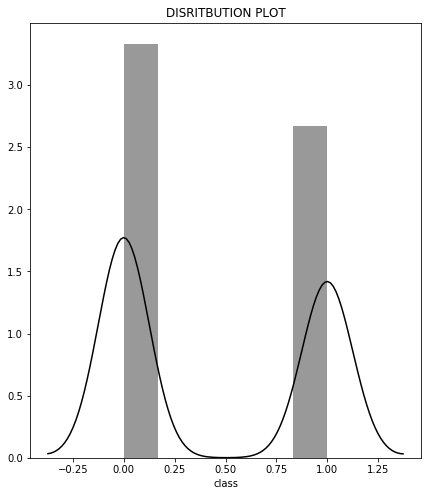

In [10]:
import seaborn as sns
plt.figure(figsize=(7,8))
plt.title('DISRITBUTION PLOT')
sns.distplot(df['class'],color ='black')


**Multivariate analysis**

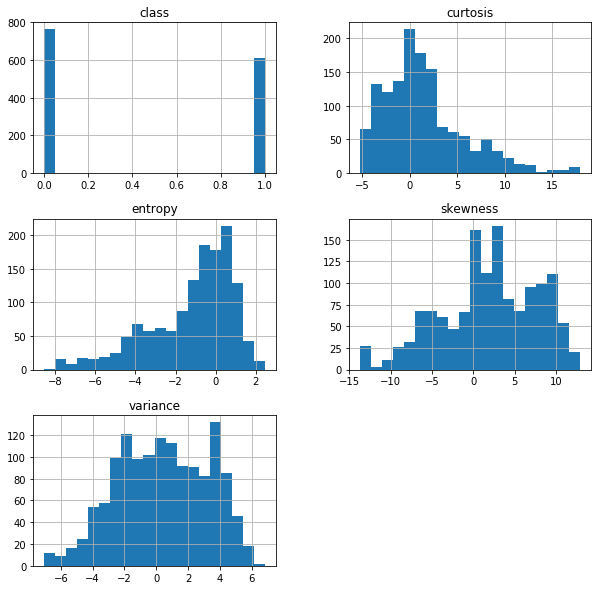

In [11]:
df.hist(bins=20,figsize=(10,10),grid='False');

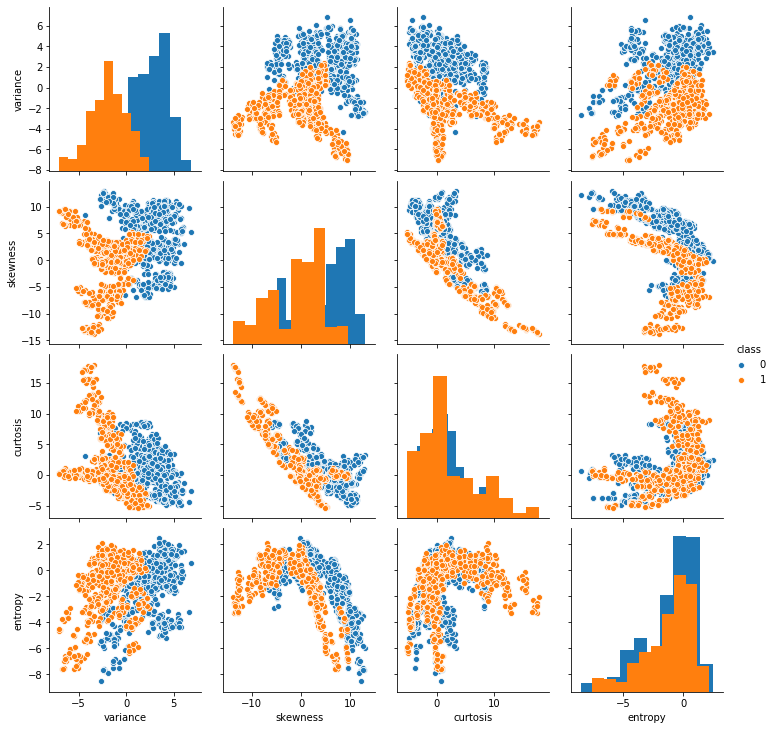

In [12]:
sns.pairplot(df,hue='class',kind='scatter',diag_kind='hist');

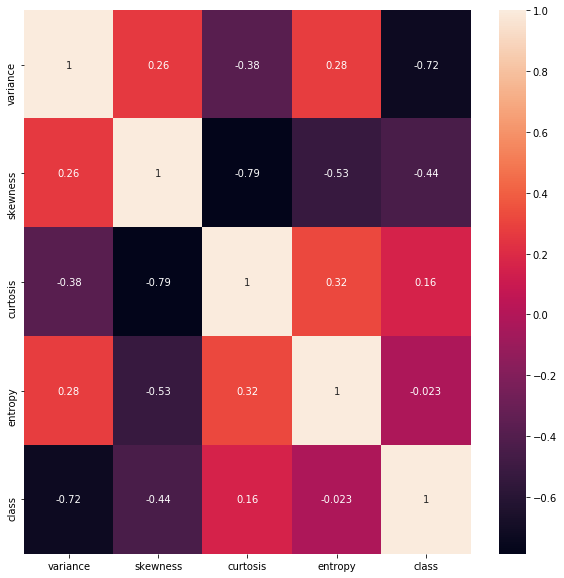

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
x=df.drop(['class'],axis=1)
y=df['class']

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x1=scalar.fit_transform(x)
x1

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.20,random_state=1)

**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [18]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score 


In [20]:
y_pred=model.predict(x_test)

In [21]:
accuracy_score(y_pred,y_test)

0.9745454545454545

In [22]:
model1=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
print("ACCURACIES :",model1)                                

ACCURACIES : [0.98181818 0.99090909 0.97272727 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy : 0.9826772310258549


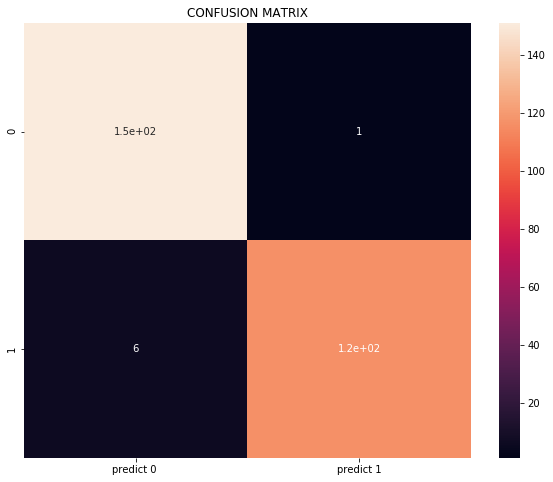

In [23]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                  columns=[i for i in ['predict 0 ','predict 1']])

plt.figure(figsize=(10,8))
plt.title('CONFUSION MATRIX')
sns.heatmap(df_cm,annot=True)


**support vector machine**

In [24]:
from sklearn.svm import SVC
model2=SVC(kernel='linear')
model2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
svm_accuracy=cross_val_score(estimator=model2,cv=10,X=x_train,y=y_train)
print('SVM Accuracies : ',svm_accuracy)
print("Mean SVN+M Accuracy :",svm_accuracy.mean())

SVM Accuracies :  [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean SVN+M Accuracy : 0.9854045037531277


In [26]:
y_pred2=model2.predict(x_test)

In [27]:
print(" ACCURACY SCORE OF TEST DATA :",accuracy_score(y_pred2,y_test))

 ACCURACY SCORE OF TEST DATA : 0.9818181818181818


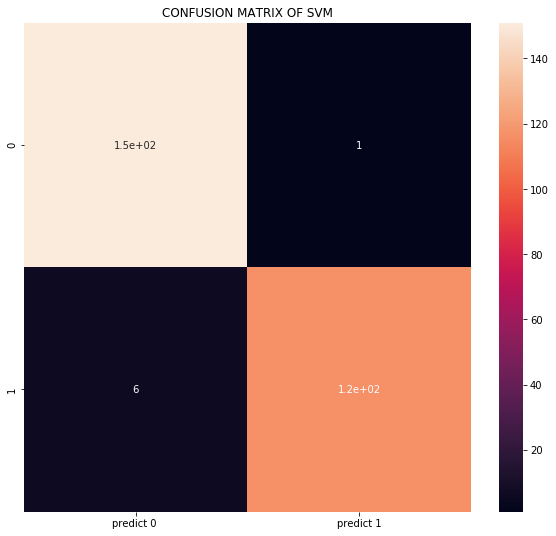

In [28]:
cm2=confusion_matrix(y_pred,y_test,labels=[0,1])
df_cm2=pd.DataFrame(cm2,index=[i for i in [0,1]],
                  columns=[i for i in ['predict 0 ','predict 1']])
plt.figure(figsize=(10,9))
plt.title('CONFUSION MATRIX OF SVM')
sns.heatmap(df_cm2,annot=True)

In [29]:
model3=SVC(kernel='rbf')
model3.fit(x_train,y_train)
rbf_accu=cross_val_score(estimator=model3,X=x_train,y=y_train,cv=10)
print("SVM Kernel(rbf) accuracies :",rbf_accu)
print(" Mean RBF_accuracy :",rbf_accu.mean())

SVM Kernel(rbf) accuracies : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 Mean RBF_accuracy : 1.0


**RandomForestClassifire**

In [33]:
from sklearn.ensemble import RandomForestClassifier


In [39]:
model4=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
model4.fit(x_train,y_train)
rmd_accu=cross_val_score(estimator=model4,X=x_train,y=y_train,cv=10)
print('Random forest Accuracies :',rmd_accu)
print('Mean Accuracy :',rmd_accu.mean())

Random forest Accuracies : [0.98181818 1.         0.99090909 0.99090909 1.         0.99090909
 1.         1.         1.         1.        ]
Mean Accuracy : 0.9954545454545455


In [41]:
y_pred4=model4.predict(x_test)

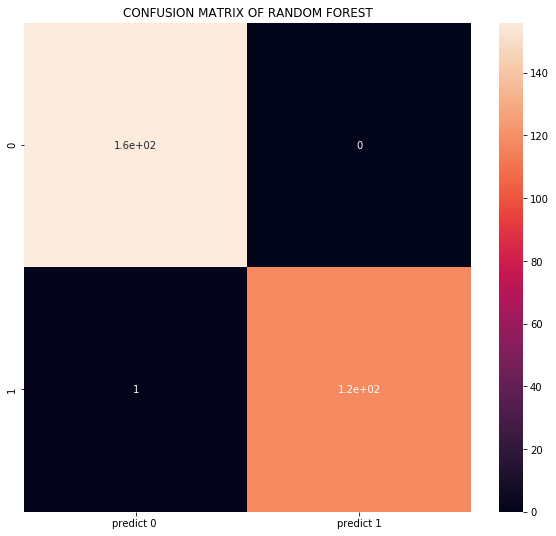

In [45]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_pred,y_test)
df_cm4=pd.DataFrame(cm4,index=[i for i in [0,1] ],
                   columns=[i for i in ['predict 0 ','predict 1']])
plt.figure(figsize=(10,9))
plt.title('CONFUSION MATRIX OF RANDOM FOREST')
sns.heatmap(df_cm4,annot=True)

**KNN**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV
param_grid={'leaf_size':[2,3,5,7,9,11,13],
    'n_neighbors':[2,3,5,7,9,11,13],
    'p':[1,2]
}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)
grid.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 3, 5, 7, 9, 11, 13],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 13], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
grid.best_p_arams_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [59]:
KNN=KNeighborsClassifier(leaf_size=2,n_neighbors=2,p=1)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [60]:
KNN_pred=KNN.predict(x_test)

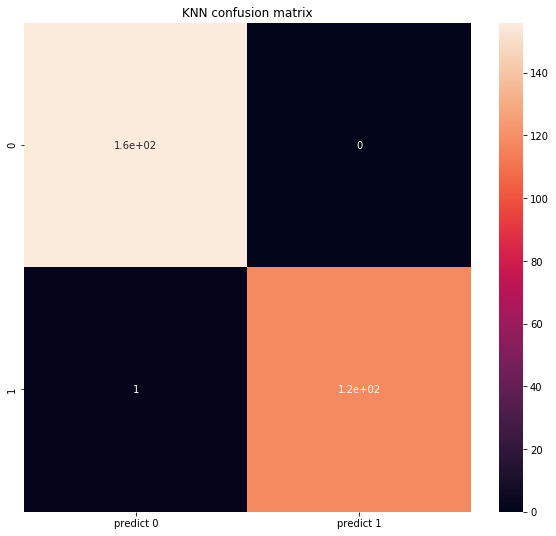

In [67]:
KNN_cm=confusion_matrix(y_pred,y_test)
df_KNN=pd.DataFrame(KNN_cm,index=[i for i in [0,1] ],
                    columns=[i for i in['predict 0','predict 1']])
plt.figure(figsize=(10,9))
plt.title('KNN confusion matrix')
sns.heatmap(df_KNN,annot=True)